## Decision_Tree

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [8]:
data = pd.read_csv('heart_disease_De.csv')

In [9]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


## 2. Exploratory Data Analysis (EDA):

In [10]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [13]:
data.describe(include=object)

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,3,3,3
top,Male,asymptomatic,normal,FALSE,flat,normal
freq,718,495,542,535,453,363


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [15]:
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [17]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [18]:
# TO CALCULATE NULL VALUE PERCENTAGE
for a in data.isna().sum() :
    print(a/(len(data))*100)
# 6 % only i can drop it

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.828193832599119
0.0
0.0
0.0


In [19]:
# DROPING NULL VALUES HAVING NO DATA THERE
data.dropna(inplace=True)

In [20]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [21]:
data.duplicated().sum()

0

In [22]:
# DROPING DUPLICATE RECORDE DY DEFAULT KEEP = FALSE
data.drop_duplicates(inplace=True)

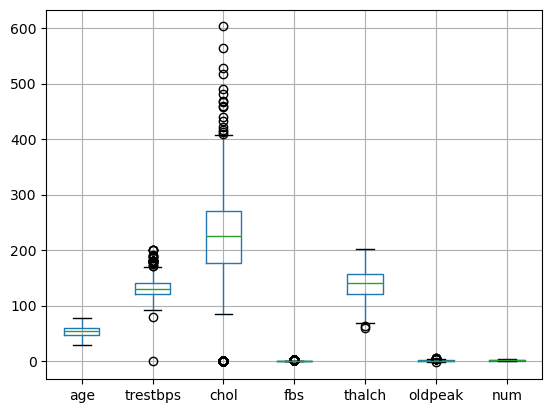

In [23]:
# PLOTING BOX PLOT
import matplotlib.pyplot as plt
data.boxplot()
plt.show()

## FEATURE SCALLING :

In [24]:
# Feature Scalling:
# STANDARDISATION :
from sklearn.preprocessing import StandardScaler
# creating instance:
std=StandardScaler()

# fit_transforma data
standard_data=std.fit_transform(data.select_dtypes("number"))


In [25]:
standard_data

array([[ 1.05284932,  0.65259141,  0.27196025,  0.50138723,  1.28861197,
        -0.86862112],
       [-1.36636445,  0.13263254,  0.00311429, -0.20192198, -0.81524872,
        -0.86862112],
       [ 0.39306375,  0.39261197, -0.09546256,  0.42324176, -0.4493599 ,
        -0.86862112],
       ...,
       [-0.0467933 , -0.38732634, -1.81607671, -0.67079478,  0.55683434,
         2.67711334],
       [ 0.94288506,  1.74450505, -0.29261627, -0.67079478,  1.92891739,
         2.67711334],
       [ 0.28309948,  1.9524886 , -1.81607671, -0.55357658,  1.47155637,
         2.67711334]])

In [26]:
# TO CHECK THE COUNTS OF CATEGORIES
data.describe(include="object")# all categorical columns having unique value less than 5

,sex,cp,restecg,exang,slope,thal
count,846,846,846,846,846,846
unique,2,4,3,2,3,3
top,Male,asymptomatic,normal,FALSE,flat,normal
freq,657,464,520,513,425,343


In [28]:
# one hot encoding :pandas get_dummies method
data=pd.get_dummies(data)

In [29]:
data

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,False,True,False,...,False,False,True,False,True,False,False,True,False,False
1,41,135,203,False,132,0.0,0,False,True,False,...,True,False,True,False,False,True,False,True,False,False
2,57,140,192,False,148,0.4,0,False,True,True,...,True,False,True,False,False,True,False,True,False,False
3,52,118,186,False,190,0.0,0,False,True,False,...,False,False,True,False,False,True,False,True,False,False
4,57,110,201,False,126,1.5,0,False,True,True,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,110,0,True,92,0.0,4,False,True,True,...,True,False,True,False,False,True,False,False,True,False
902,62,160,254,True,108,3.0,4,False,True,True,...,False,True,False,True,False,True,False,False,False,True
903,53,125,0,False,120,1.5,4,False,True,True,...,True,False,True,False,False,False,True,False,True,False
904,62,166,170,False,120,3.0,4,False,True,True,...,False,True,False,True,False,True,False,False,False,True


In [30]:
# CORR()METHOD: SHOWING CORRELATION BETWEEN ALL NUMERIC VARRIABLE
# Create a mask for values less than or equal to 0.5
correlation_matrix=data.corr()
correlation_matrix

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
age,1.000000,0.244301,-0.107471,0.176690,-0.345960,0.242662,0.331399,-0.036332,0.036332,0.164696,...,-0.226558,0.115875,-0.193501,0.193501,-0.009900,0.086867,-0.084683,-0.060769,-0.087618,0.137896
trestbps,0.244301,1.000000,0.100912,0.098255,-0.109390,0.167131,0.126158,0.002081,-0.002081,0.040705,...,-0.118277,0.098307,-0.153532,0.153532,-0.041283,0.052869,-0.023200,0.017124,-0.053335,0.039555
chol,-0.107471,0.100912,1.000000,-0.123729,0.224456,0.029898,-0.256191,0.201052,-0.201052,-0.127816,...,-0.026843,-0.152811,0.039251,-0.039251,-0.039397,-0.008078,0.040283,0.003914,0.114158,-0.117935
fbs,0.176690,0.098255,-0.123729,1.000000,-0.061331,0.024365,0.137588,-0.074986,0.074986,0.063037,...,-0.075508,0.070094,-0.011228,0.011228,0.031546,0.009866,-0.035879,0.070020,-0.062141,0.005019
thalch,-0.345960,-0.109390,0.224456,-0.061331,1.000000,-0.139598,-0.350331,0.176222,-0.176222,-0.345883,...,0.015062,-0.159439,0.349959,-0.349959,-0.064750,-0.247679,0.316186,-0.081780,0.178394,-0.112203
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577,-0.102397,0.102397,0.276711,...,-0.114086,0.046001,-0.385557,0.385557,0.035486,0.211097,-0.253649,-0.021891,-0.144905,0.163579
num,0.331399,0.126158,-0.256191,0.137588,-0.350331,0.437577,1.000000,-0.259610,0.259610,0.434415,...,-0.164811,0.110729,-0.385383,0.385383,0.027564,0.187641,-0.222268,-0.001527,-0.239249,0.241689
sex_Female,-0.036332,0.002081,0.201052,-0.074986,0.176222,-0.102397,-0.259610,1.000000,-1.000000,-0.197647,...,-0.006824,-0.042183,0.182355,-0.182355,-0.025555,-0.028077,0.050484,-0.106080,0.233351,-0.147503
sex_Male,0.036332,-0.002081,-0.201052,0.074986,-0.176222,0.102397,0.259610,-1.000000,1.000000,0.197647,...,0.006824,0.042183,-0.182355,0.182355,0.025555,0.028077,-0.050484,0.106080,-0.233351,0.147503
cp_asymptomatic,0.164696,0.040705,-0.127816,0.063037,-0.345883,0.276711,0.434415,-0.197647,0.197647,1.000000,...,-0.069308,0.100096,-0.439322,0.439322,-0.015928,0.175310,-0.174157,-0.007343,-0.174756,0.181646


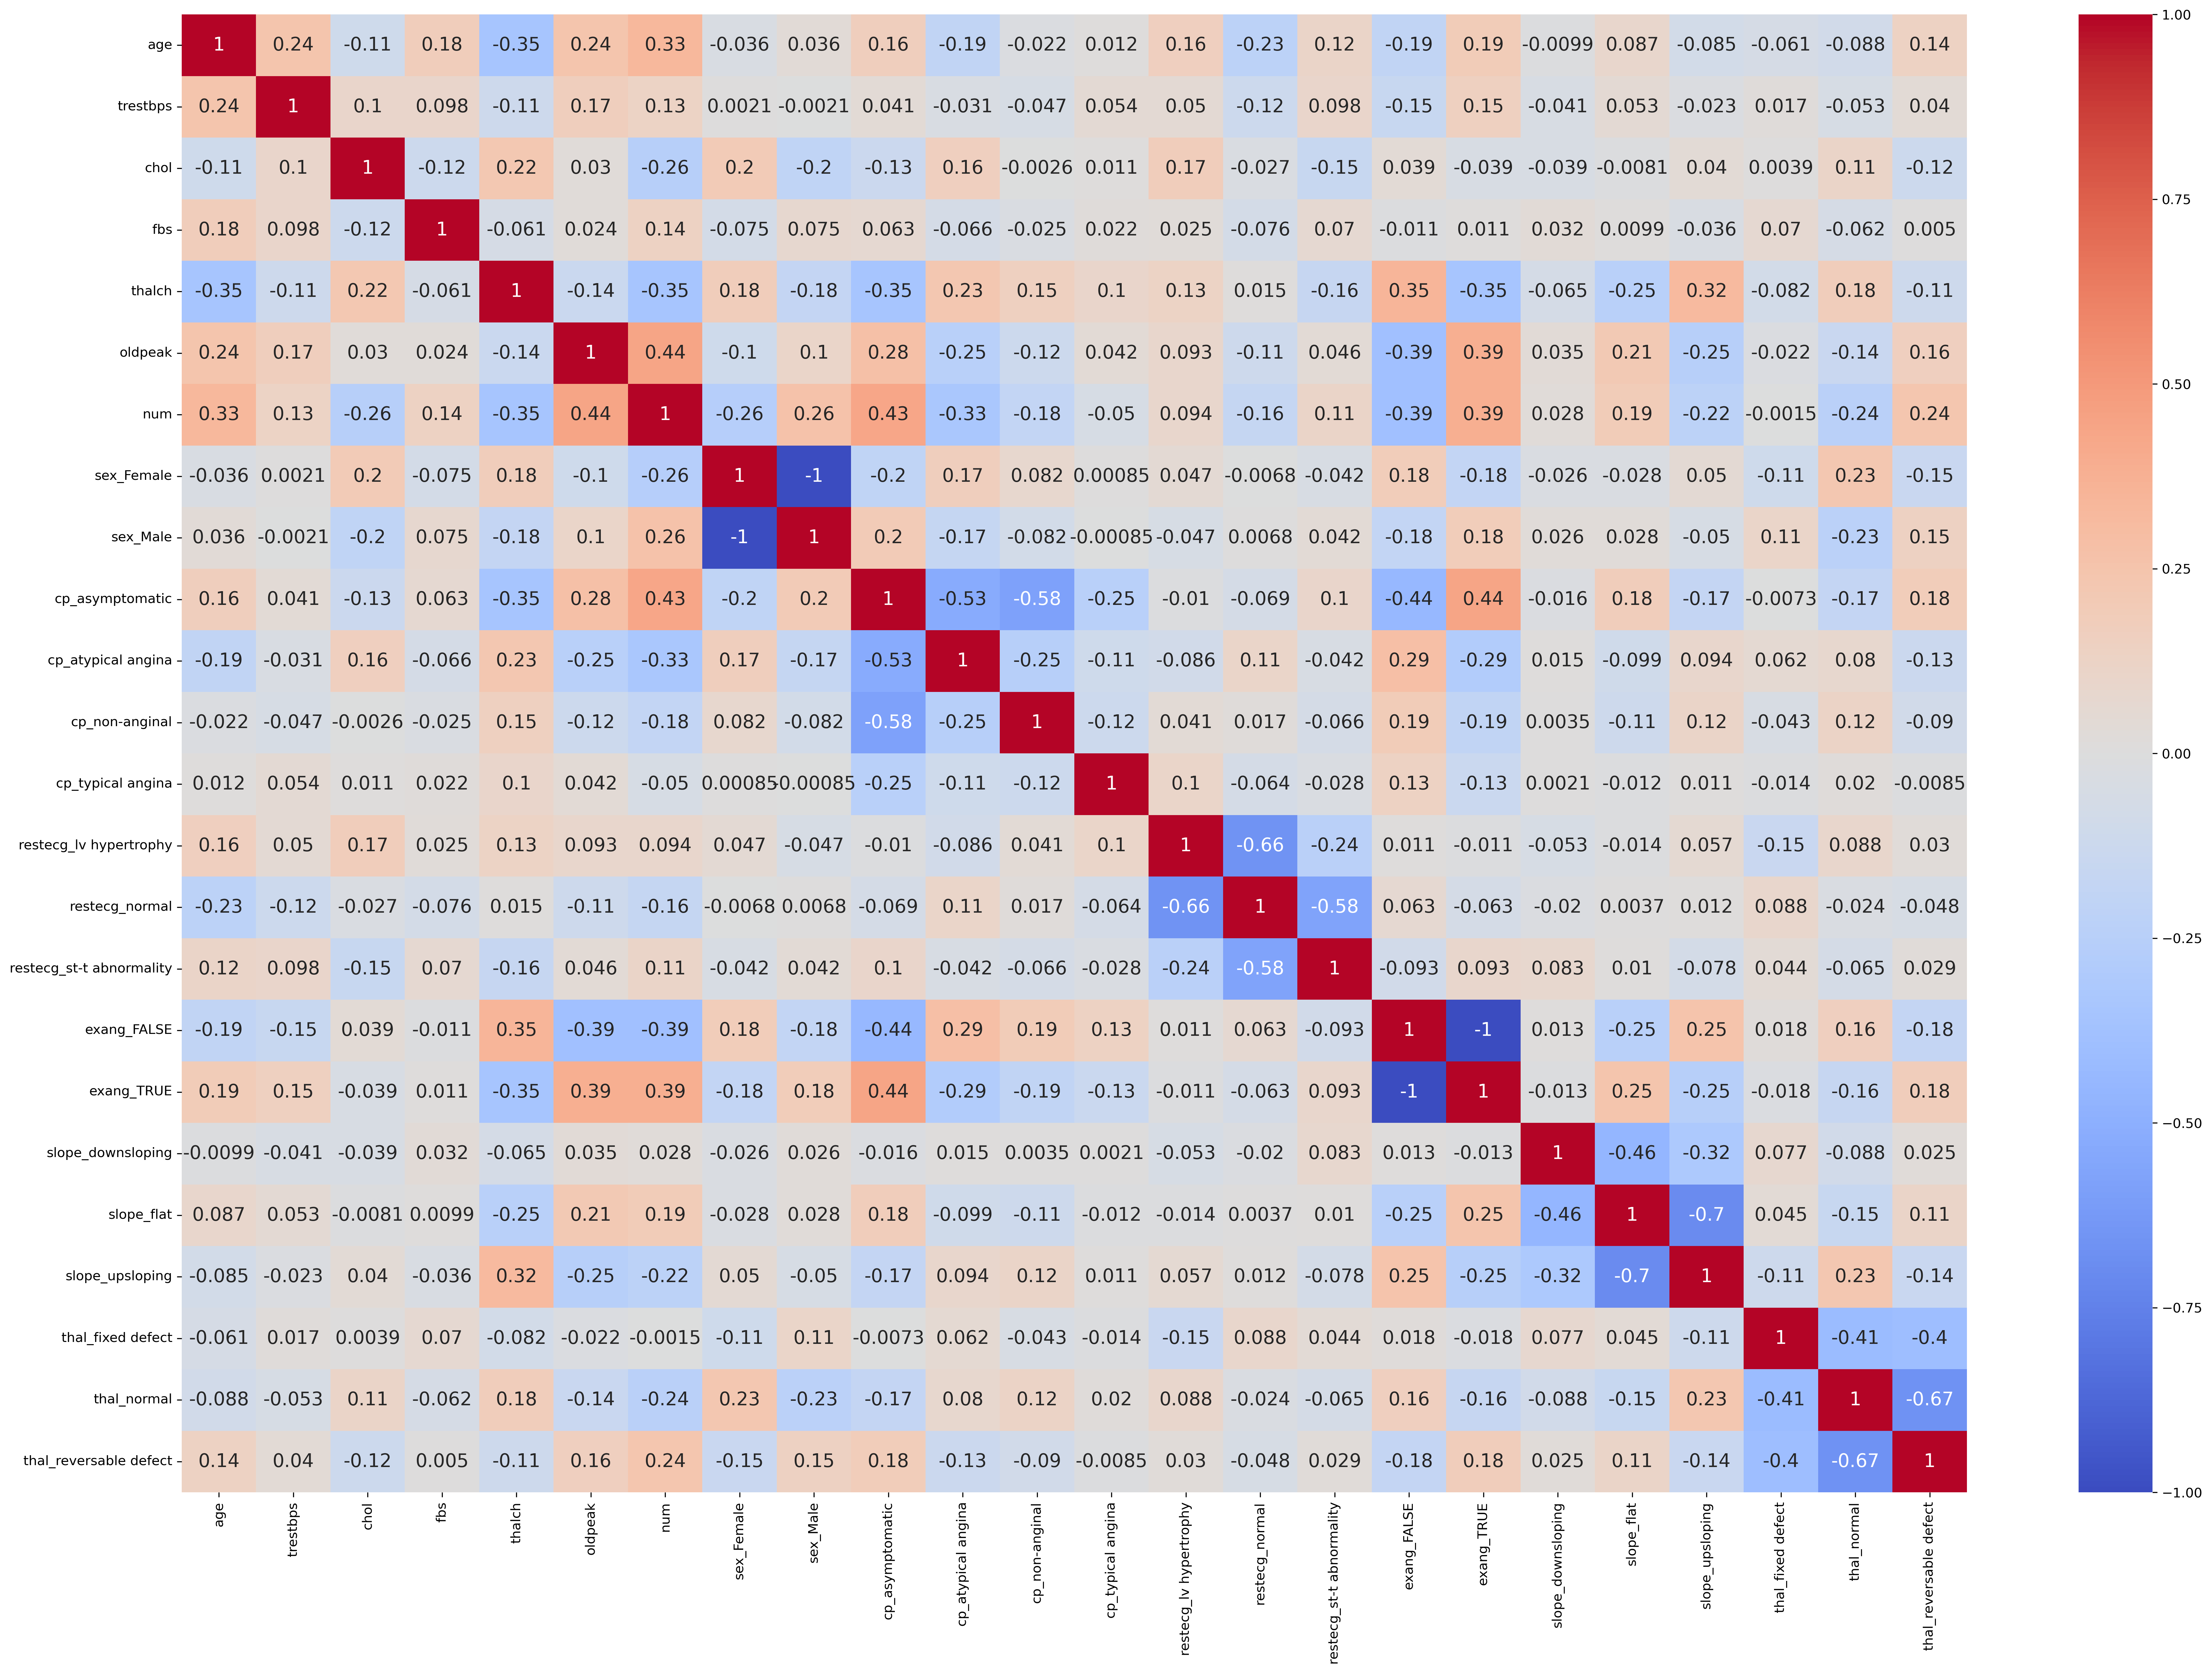

In [32]:
# HEATMAP:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20),dpi=300)
sns.heatmap(data.corr(),annot=True,annot_kws={"size": 14},cmap="coolwarm")
plt.show()
# all features showing low correlation


In [33]:
# TO GET SEPARETE HEAT MAP WITH ONLY MODEREATE OR HIGH CORRELATION VARIABLE :

# Filter for correlations outside the range of -0.5 to 0.5
filter_corr_matrics = correlation_matrix[
    ((correlation_matrix > 0.5) | (correlation_matrix < -0.5)) & (correlation_matrix != 1.0)]

# Drop rows/cols with all NaN values
filter_corr_matrics = filter_corr_matrics.dropna(how='all').dropna(axis=1, how='all')




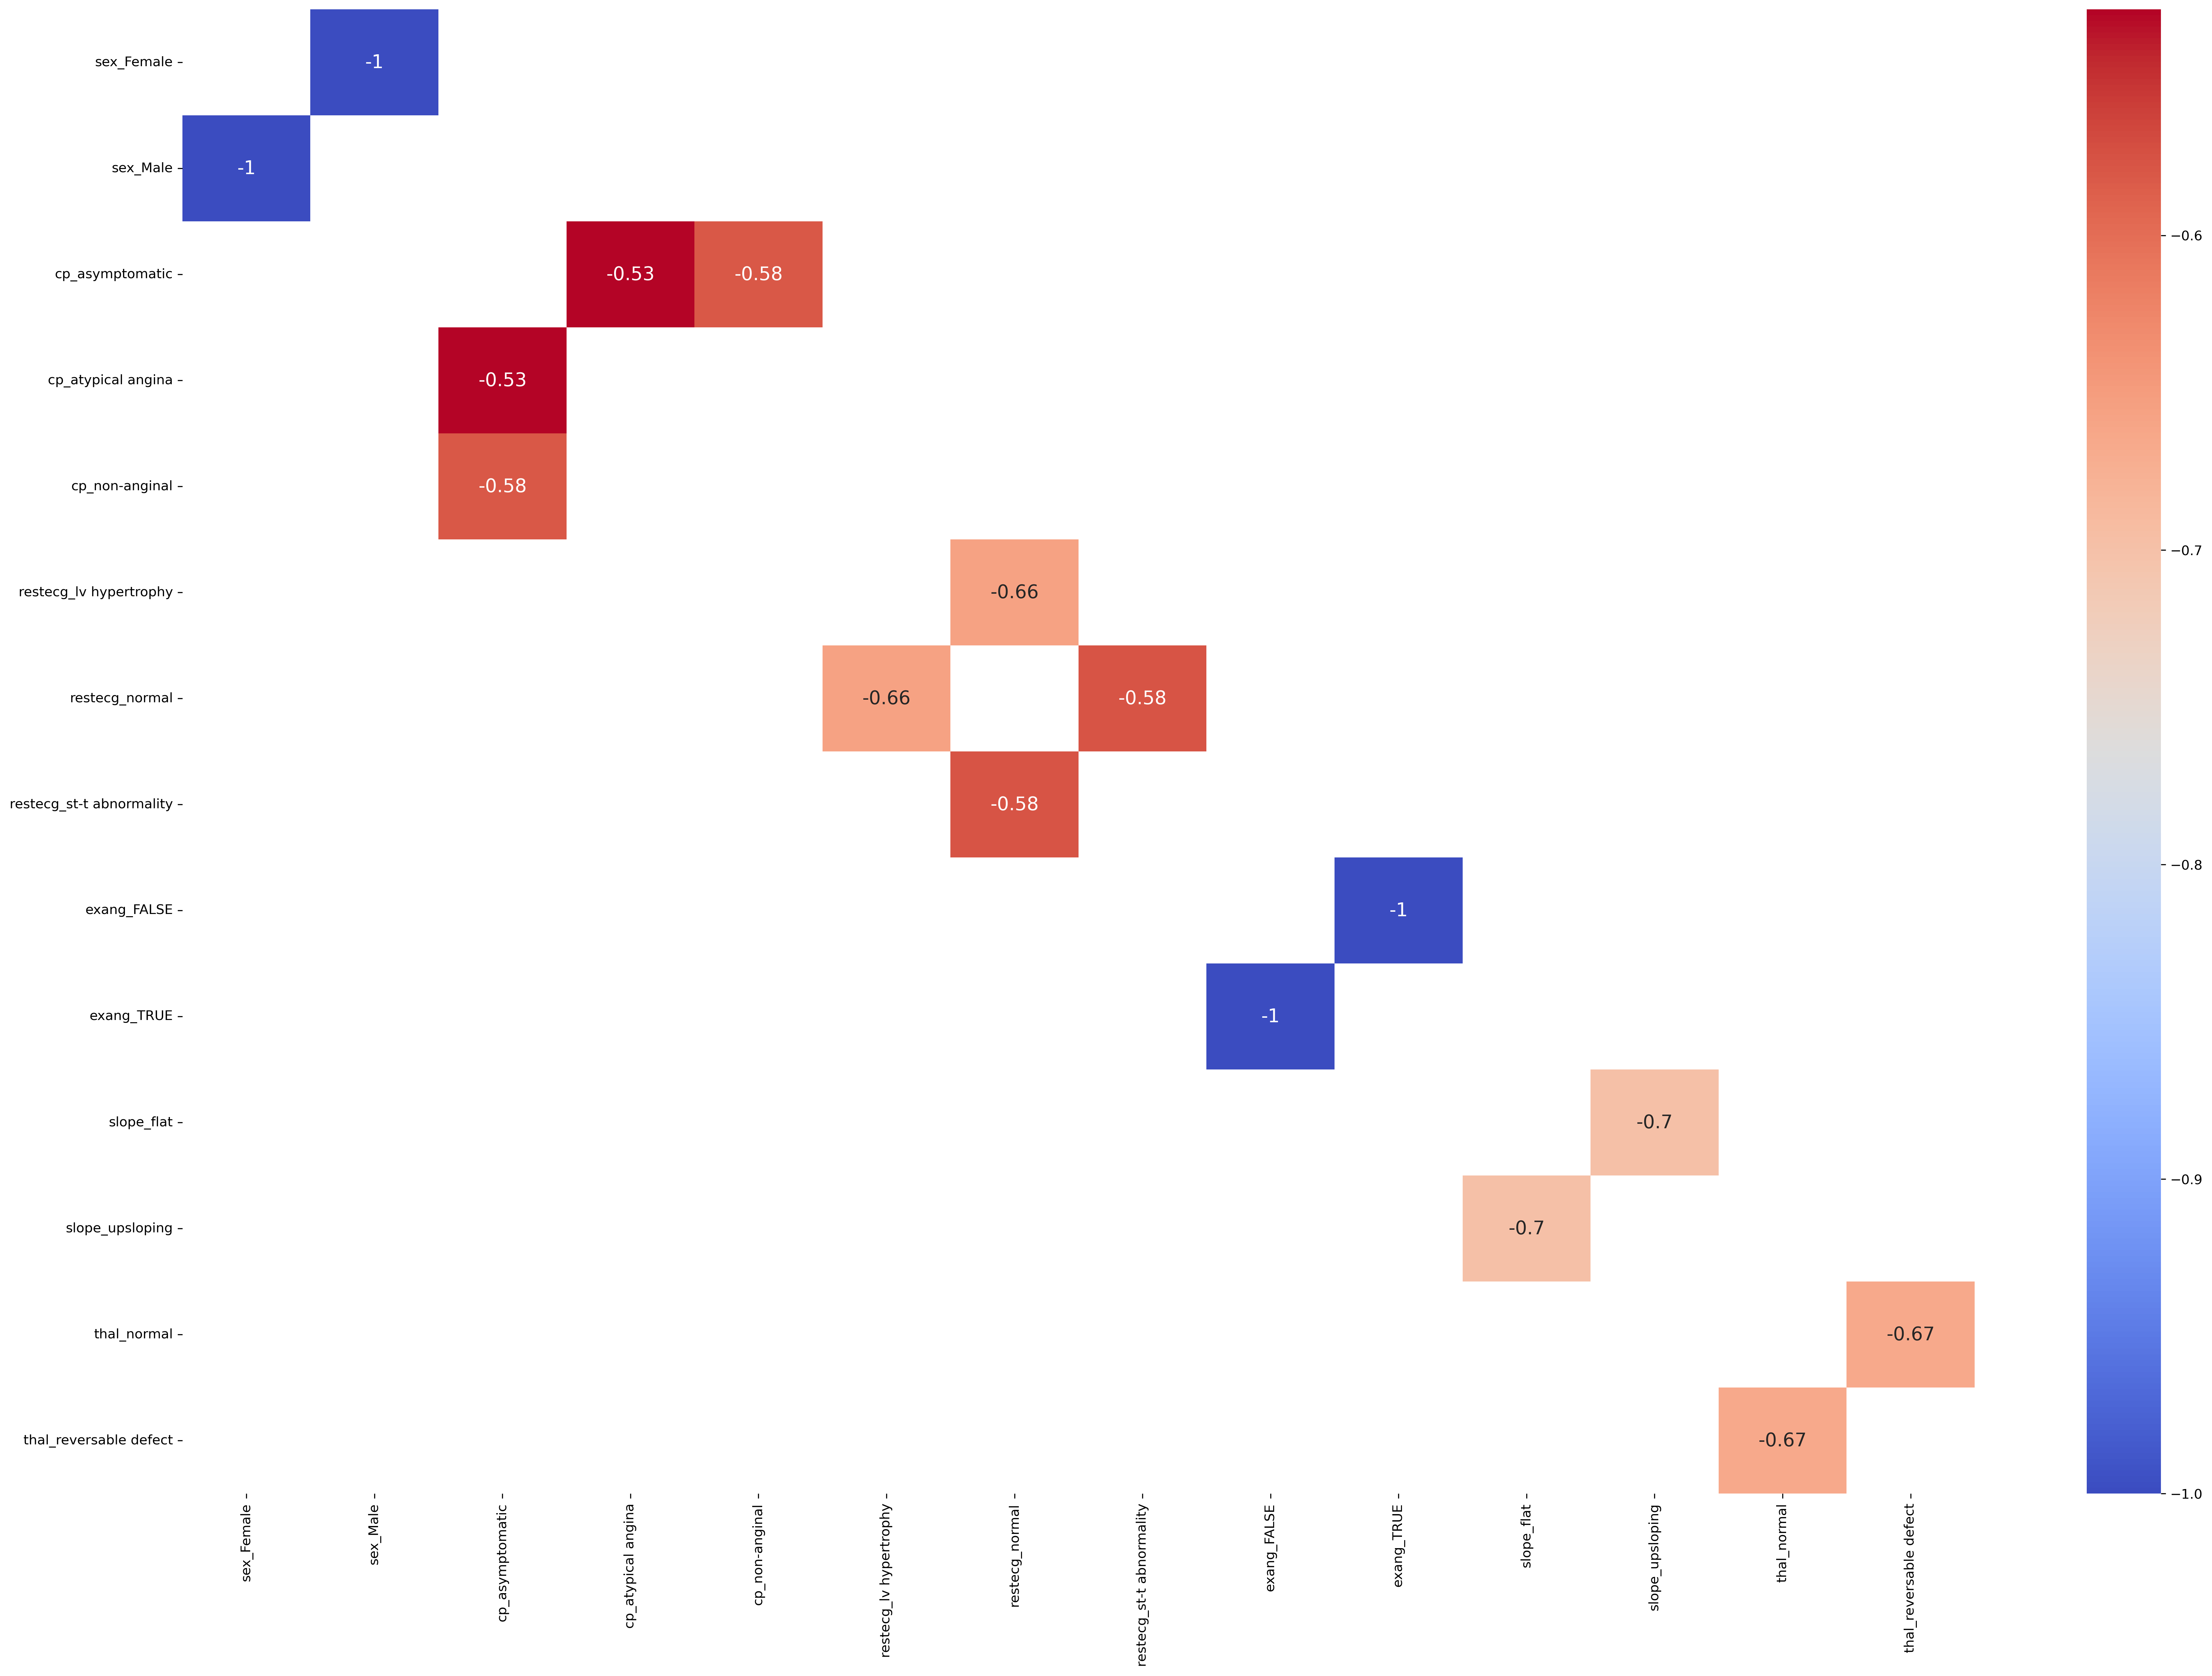

In [34]:
 # HEATMAP:
plt.figure(figsize=(30, 20), dpi=300)
sns.heatmap(filter_corr_matrics, annot=True, annot_kws={"size": 14}, cmap="coolwarm")
plt.show()

In [35]:
data

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,False,True,False,...,False,False,True,False,True,False,False,True,False,False
1,41,135,203,False,132,0.0,0,False,True,False,...,True,False,True,False,False,True,False,True,False,False
2,57,140,192,False,148,0.4,0,False,True,True,...,True,False,True,False,False,True,False,True,False,False
3,52,118,186,False,190,0.0,0,False,True,False,...,False,False,True,False,False,True,False,True,False,False
4,57,110,201,False,126,1.5,0,False,True,True,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,110,0,True,92,0.0,4,False,True,True,...,True,False,True,False,False,True,False,False,True,False
902,62,160,254,True,108,3.0,4,False,True,True,...,False,True,False,True,False,True,False,False,False,True
903,53,125,0,False,120,1.5,4,False,True,True,...,True,False,True,False,False,False,True,False,True,False
904,62,166,170,False,120,3.0,4,False,True,True,...,False,True,False,True,False,True,False,False,False,True


In [36]:
# SPLITING THE DATA INTO TRAINING AND TESTING :
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data.drop("num",axis=1),data["num"],test_size=0.2,random_state=1)
#data.drop("num",axis=1),data["num"]----> x,y

In [37]:
xtrain#TRAING DATA PF X -VARIABLES HAVING 676 ROWS WHICH IS 80% OF TOTAL DATA

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
136,51,125,213,False,125,1.4,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
224,54,120,221,False,138,1.0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
409,39,110,280,False,150,0.0,False,True,True,False,...,True,False,True,False,False,True,False,True,False,False
135,74,120,269,False,121,0.2,True,False,False,True,...,False,False,False,True,False,False,True,False,True,False
642,62,120,254,False,93,0.0,False,True,False,True,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,52,128,204,True,156,1.0,False,True,True,False,...,True,False,False,True,False,True,False,True,False,False
812,57,130,131,False,115,1.2,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
73,51,120,295,False,157,0.6,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
236,46,130,238,False,90,0.0,True,False,True,False,...,True,False,True,False,False,True,False,False,True,False


In [38]:
ytrain.unique()# THERE ARE 5 CLASSES IN TARGET VARIABLE

array([0, 1, 2, 4, 3], dtype=int64)

## MULTICLASS CLASSIFICATION PROBLEM :

In [39]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [40]:
from sklearn.metrics import accuracy_score
y_train_pred = dc.predict(xtrain)
training_accuracy = accuracy_score(ytrain, y_train_pred)
print("Training Accuracy:", training_accuracy)


Training Accuracy: 1.0


# # TRAING ACCURACY IS 1 THAT MEANS MODEL PREDDICTED ALL CORRECT VALUES (MODEL IS 100% CORRECT)
A model with 100% training accuracy may be overfitting the data, meaning it has learned the training data too well, including noise and outliers. This can lead to poor performance on unseen data.


# EVALUATING THE MODEL
## CHECKING TEST ACCURACY

In [41]:
# COMPUTING Y HAT ON TEST DATA
yhat_test=dc.predict(xtest)
#target [0=no heart disease; 1,2,3,4 = stages of heart disease ]

In [42]:
len(yhat_test)


170

In [43]:
# JUST CREATING DATAFRAME WITH ACTUAL TEST VALUES AND PREDICTED :
y_yhat=pd.DataFrame({"actual":ytest,"predicted":yhat_test})
y_yhat

,actual,predicted
729,2,0
377,0,0
186,0,3
486,1,2
745,2,1
...,...,...
590,1,0
469,1,1
458,1,3
566,1,1


# TO CHECK TEST ACCURACY OF MODEL:

In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, roc_curve

In [45]:
accuracy=accuracy_score(ytest,yhat_test)
precision=precision_score(ytest,yhat_test,average="weighted")
recall=recall_score(ytest,yhat_test,average="weighted")
f1=f1_score(ytest,yhat_test,average="weighted")
y_probs = dc.predict_proba(xtest)

# Binarize the output labels for multi-class classification (One-vs-Rest)
# Binarize ytest to make it compatible with roc_auc_score
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(ytest, classes=[0, 1, 2, 3, 4])
roc_auc=roc_auc_score(y_test_bin,y_probs,multi_class="ovr")

In [46]:
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 : {f1}")
print(f"Roc_Auc : {roc_auc}")

Accuracy : 0.47058823529411764
Precision : 0.4939171226453745
Recall : 0.47058823529411764
F1 : 0.4801599158931539
Roc_Auc : 0.6054522594593668


In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# StratifiedKFold ensures that each fold has the same proportion of classes
skf = StratifiedKFold(n_splits=5)

# Evaluate model using cross-validation
cv_scores = cross_val_score(dc, xtrain, ytrain, cv=skf, scoring='roc_auc_ovr')
cv_scores

array([0.59604586, 0.57604683, 0.55867457, 0.57450414, 0.56704175])

In [48]:
cv_scores.mean()

0.5744626291148374

- **Accuracy (0.4615)**: The model is correct about 46.15% of the time.

- **Precision (0.4316)**: About 43.16% of the predicted positive cases are actually correct, indicating some false positives.

- **Recall (0.4615)**: The model identifies 46.15% of the actual positive cases, meaning it misses some.

- **F1 Score (0.4450)**: This score balances precision and recall, showing moderate overall performance.

- **ROC AUC (0.5805)**: The model can distinguish between classes to some extent, but not very well (0.5 means no discrimination).

- **Cross-Validation Score (0.5936):** The model's average performance across multiple folds is about 59.36%, suggesting it may generalize better than indicated by the test accuracy.


## **The model needs improvement in all areas for better performance.**
## **The cross-validation score shows some potential for better generalization.**

# PARAMETER TUNNING

In [49]:
# TO IMPROVE THE ACCURACY OF MODEL:
#COMMON TECHNIQUES : GRID SEARCH, RANDOM SEARCH

In [50]:
# GRID SEARCH ALGORITHM :
# SET UP OF HYPER PARAMETER GRID:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for split quality
    'max_depth': [None, 4, 5, 6, 7, 8, 10, 20, 30, 40],  # Max depth of the tree
    'min_samples_split': [2, 3, 4, 10, 20,30],  # Minimum samples required to split a node (changed 1 to 2)
    'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10,15,20,25,30],
    'class_weight': [None, 'balanced'],
    'random_state': [1] } # Random state for reproducibility # Minimum samples required at a leaf node


In [51]:
from sklearn.model_selection import GridSearchCV
# INITIALISING GRID SEARCH ALGORITHM:
grid_search=GridSearchCV(estimator=dc,param_grid=param_grid,cv=5,scoring='roc_auc_ovr',n_jobs=-1,verbose=2)

In [52]:
# FITTING TRAING DATA TO THAT ALGORITH :
grid_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 2640 candidates, totalling 13200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10, 15, 20, 25,
                                              30],
                         'min_samples_split': [2, 3, 4, 10, 20, 30],
                         'random_state': [1]},
             scoring='roc_auc_ovr', verbose=2)

In [53]:
# TO GET BEST PARAMETER TO CREATE HIGH PERFORMANCE  MODEL:
best_parameter=grid_search.best_params_
best_parameter

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'random_state': 1}

In [54]:
best_score=grid_search.best_score_
best_score

0.7224212755392424

# MODEL BULING WITH THE BEST PARAMETERS :

In [55]:
# CREATING INSTANCE:
updated_dc=DecisionTreeClassifier(criterion='entropy',
                          max_depth=4,
                          min_samples_leaf=10,
                          min_samples_split=2,
                          random_state=1,
                          class_weight=None)

In [56]:
# FITTING TRAINING DATA:
updated_dc.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       random_state=1)

In [57]:
# FITTING TEST DATA TO GET Y HAT WITH THIS UPDATED MODEL
updated_yhat=updated_dc.predict(xtest)


# NOW CHECKING TEST ACCURACY OF UPDATED MODEL  :

In [58]:
# Predict and evaluate on the test set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(ytest,updated_yhat))
print(classification_report(ytest, updated_yhat))

[[64 12  0  0  0]
 [15 32  0  0  1]
 [ 4 21  0  0  2]
 [ 3 10  0  0  0]
 [ 1  4  0  0  1]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        76
           1       0.41      0.67      0.50        48
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        13
           4       0.25      0.17      0.20         6

    accuracy                           0.57       170
   macro avg       0.28      0.34      0.30       170
weighted avg       0.45      0.57      0.50       170



C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YOGENDRA JANGID\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# ACCUEACY,PRECISION,RECALL,F1_SCORE,ROC-AUC:

In [59]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, roc_curve

In [60]:
accuracy=accuracy_score(ytest,updated_yhat)
precision=precision_score(ytest,updated_yhat,average="weighted",zero_division=0)
recall=recall_score(ytest,updated_yhat,average="weighted")
f1=f1_score(ytest,updated_yhat,average="weighted")

- **The roc_auc_score function in scikit-learn is designed to handle binary classification by default.**
- **It expects the target variable (the true labels) to be either 0 or 1.**

- **When dealing with multi-class problems, you need to adapt the target variable to fit this binary expectation.**

- **Binarize ytest to make it compatible with roc_auc_score using label_binarize**

In [61]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(ytest, classes=[0, 1, 2, 3, 4])
y_probs=updated_dc.predict_proba(xtest)
roc_auc = roc_auc_score(y_test_bin, y_probs, multi_class='ovr')

In [62]:
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 : {f1}")
print(f"Roc_Auc : {roc_auc}")

Accuracy : 0.5705882352941176
Precision : 0.4520651997158532
Recall : 0.5705882352941176
F1 : 0.5004115174884988
Roc_Auc : 0.7119331774486788


In [63]:
# StratifiedKFold ensures that each fold has the same proportion of classes
skf = StratifiedKFold(n_splits=5)

# Evaluate model using cross-validation
updated_cv_scores = cross_val_score(updated_dc, xtrain, ytrain, cv=skf, scoring='roc_auc_ovr')
updated_cv_scores

array([0.7066947 , 0.68931027, 0.71990144, 0.67800304, 0.68881391])

In [64]:
updated_cv_scores.mean()

0.6965446737895683

- **Accuracy (0.5503)**: The model correctly predicts 55.03% of test instances, showing improvement.
- **Precision (0.4389)**: About 43.89% of predicted positives are actual positives, indicating moderate performance.
- **Recall (0.5503)**: The model identifies 55.03% of actual positives, suggesting improved true positive detection.
- **F1 Score (0.4697)**: The F1 score is 46.97%, reflecting moderate overall performance with room for improvement.
- **ROC AUC (0.7186)**: A score of 0.72 indicates good class distinction ability, better than random chance.
- **Cross-Validation Score (0.7538)**: An average accuracy of 75.38% suggests better generalization across data subsets, though the test accuracy shows some specific case issues.

## Overall, the model has improved but still has potential for further enhancement.

# TO IMPROVE MODEL MORE :

In [65]:
# FEATURE SELECTION :
# NOW I WANT TO SELECTION IMPORTANT COLUMNS ONLY FROM THE DATA
# THAT WILL INCREASE THE MODEL PERFORMANCE

# PREDICTIVE POWER SCORE (PPS) :

In [66]:
# INSTALLING PPSCORE
! pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2514 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\pandas\arrays
  creating build\lib.win-amd64-cpython-312\pand